# Build regression models

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
from joblib import Parallel, delayed
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

d = './raw_data/'

In [2]:
# Import data
with open('processed_data/analysis_build.pkl', 'rb') as filename:  
    processed_data = pickle.load(filename)

In [3]:
predictors = ['runtime', 
              'is_Winter_Holiday', 'is_Summer', 'is_Awards', 'is_Spring', 'is_Fall',
              'log_adjusted_budget', 'avg_wroi_similar_overview',
              'avg_wroi_director_id_1', #'avg_wroi_director_id_2', 'avg_wroi_director_id_3',
              'avg_wroi_actor_id_1', 'avg_wroi_actor_id_2', 'avg_wroi_actor_id_3',
              'avg_wroi_genre_name_1', 'avg_wroi_genre_name_2', 'avg_wroi_genre_name_3', 
              'avg_wroi_production_company_1','avg_wroi_production_company_2', 'avg_wroi_production_company_3',
              'avg_rating_director_id_1', #'avg_rating_director_id_2', 'avg_rating_director_id_3', 
              'avg_rating_actor_id_1', 'avg_rating_actor_id_2', 'avg_rating_actor_id_3',
              'avg_rating_genre_name_1', 'avg_rating_genre_name_2','avg_rating_genre_name_3', 
              'avg_rating_production_company_1','avg_rating_production_company_2', 'avg_rating_production_company_3'
             ]
outputs = ['wroi']

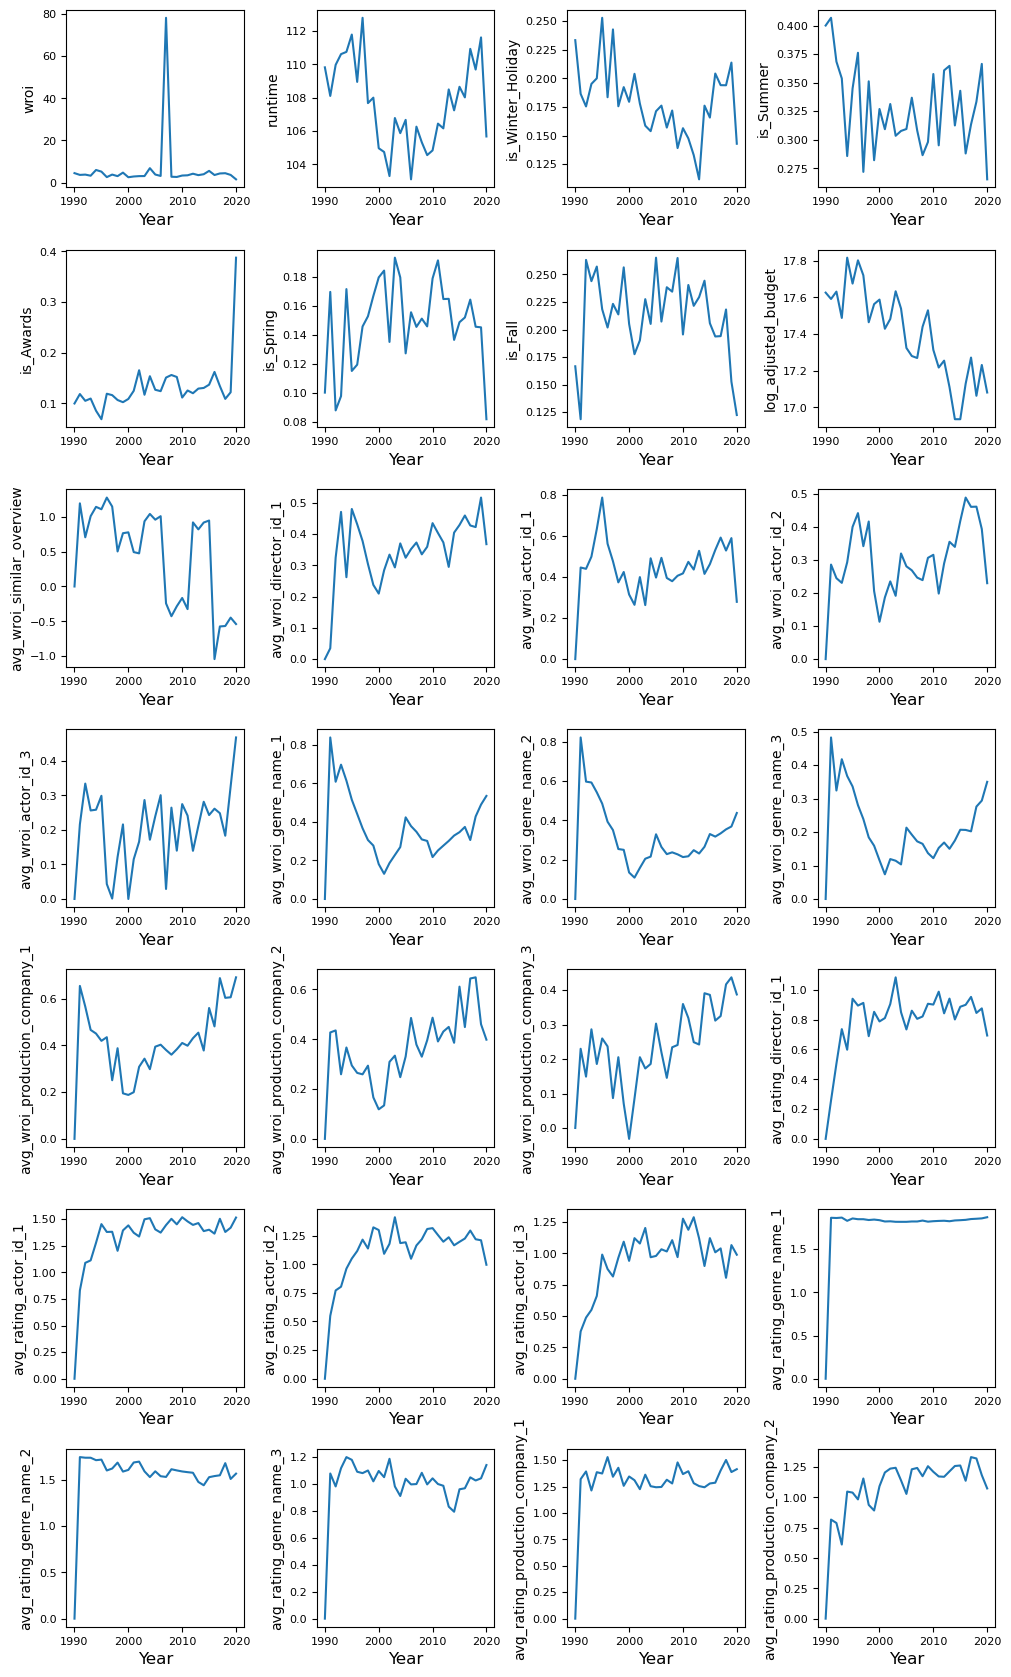

In [4]:
# Inspect distribution of observables
select_vars = outputs + predictors

fig, axs = plt.subplots(len(select_vars) // 4, 4, figsize=(3*4, 3*len(select_vars) // 4), sharex=False, sharey=False)
input_data = processed_data[select_vars + ['year']].groupby(['year'], as_index = False).mean()

for i, ax in enumerate(axs.flat):
    if i < len(select_vars):
        ax.plot(input_data['year'], input_data[select_vars[i]]);
        ax.minorticks_off()
        ax.yaxis.set_tick_params(labelbottom=True)
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.set_box_aspect(1)
        ax.set_ylabel(select_vars[i], fontsize = 10)
        ax.set_xlabel('Year', fontsize = 12)

fig.subplots_adjust(wspace=.4, hspace=.35)

Need to scale variables, and figure out how to measure performance.

#### Linear regression

-0.2001731217177709
-0.4603683163234631
-0.011916117764141143
-0.09894519676230673
0.028472749994117308
-0.09116993695642406
-0.04588866357338017
0.0164171144809917
-0.015042526052023275
-0.08682252187119222
-0.021649145647463675
-0.006134821560978221
-0.064351463656102
0.08468006404996087
0.08736187927394046
0.09331828982437829
0.0808139481594522
0.005350163693466747
0.12783822328673544
0.1724922980150151
0.17320268678096196
0.2371929922873376
0.09106727357713562
0.19082797211613822
0.13516299896115147
0.13559692502894016
0.07206236139503552
0.10816335368333485
0.18147644734134638
-0.2554108844923484


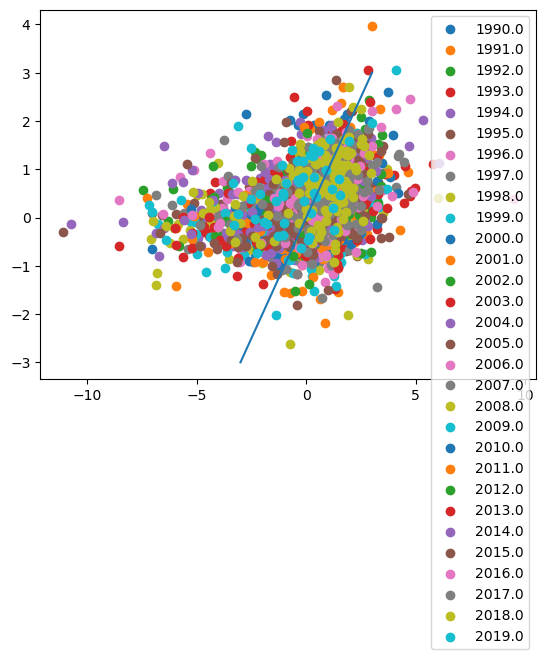

In [5]:
years = np.unique(processed_data.year)

for year in years[:-1]:
    train_data = processed_data.loc[(processed_data.year <= year)]
    test_data = processed_data.loc[processed_data.year == year + 1]
    lr = linear_model.LinearRegression().fit(train_data[predictors], np.log(train_data[outputs]))
    print(lr.score(test_data[predictors], np.log(test_data[outputs])))
    plt.scatter(np.log(test_data[outputs]), lr.predict(test_data[predictors]), label = str(year))

plt.plot(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))
# plt.semilogy()
# plt.semilogx()
plt.legend()

In [6]:
# Need to figure out which covariates are most important
# Maybe add as a regressor the (geometric) average ROI of the previous year(s)
# Build content-based covariate
# Include keywords and attempt similarity matching: ROI**(similarity score)

### KNN regression

-0.1627715059927648
-0.08434150358736403
-0.06317284411357016
-0.0706727498589681
-0.10291105374662868
-0.20925286887336148
-0.0508200898645248
0.08209316604608419
-0.21589983424726067
-0.28676786351878314
-0.23427943788377448
-0.15768562421891175
-0.30966649332883556
-0.1476657917422688
-0.042262633279723794
-0.09667018385662196
0.07017435736452893
-0.05060813180585222
0.16162930625219496
0.13998739639385882
-0.12881535450129755
0.008702185808663998
0.04267694985513104
0.11921259596105649
-0.07631119243045092
-0.05927484775572589
-0.16749515141100058
-0.23373669843121458
0.008029241147632593
-0.2250809090585819


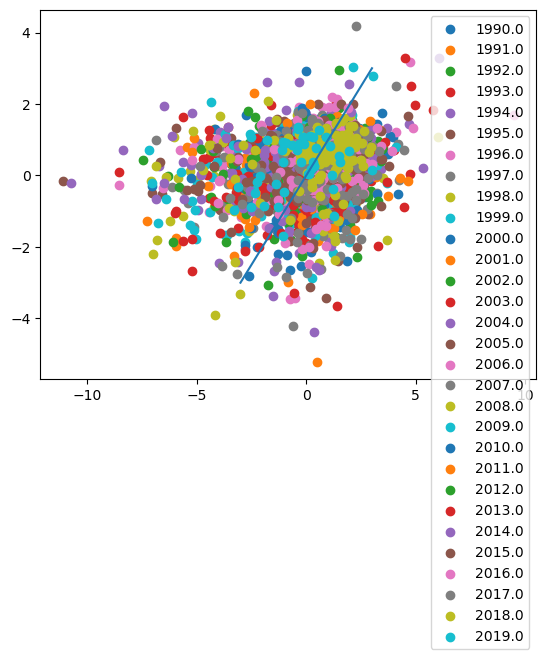

In [7]:
years = np.unique(processed_data.year)

for year in years[:-1]:
    train_data = processed_data.loc[(processed_data.year <= year)]
    test_data = processed_data.loc[processed_data.year == year + 1]
    neigh = KNeighborsRegressor(n_neighbors=5).fit(train_data[predictors], np.log(train_data[outputs]))
    print(neigh.score(test_data[predictors], np.log(test_data[outputs])))
    plt.scatter(np.log(test_data[outputs]), neigh.predict(test_data[predictors]), label = str(year))

plt.plot(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))
# plt.semilogy()
# plt.semilogx()
plt.legend()

### Logistic regression

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

0.5423728813559322
0.5614035087719298
0.5487804878048781
0.4714285714285714
0.5287356321839081
0.6146788990825688
0.5922330097087378
0.549618320610687
0.6410256410256411


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

0.5769230769230769
0.625
0.5766871165644172
0.5448275862068965
0.6346153846153846
0.6022099447513812
0.5906735751295337


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

0.627906976744186
0.5885416666666666
0.5960264900662252
0.5921787709497207
0.5846994535519126
0.6962025316455697


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

0.5588235294117647
0.6306818181818182
0.7314285714285714
0.6178010471204188
0.6865671641791045
0.6242424242424243
0.6335877862595419
0.5510204081632653


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

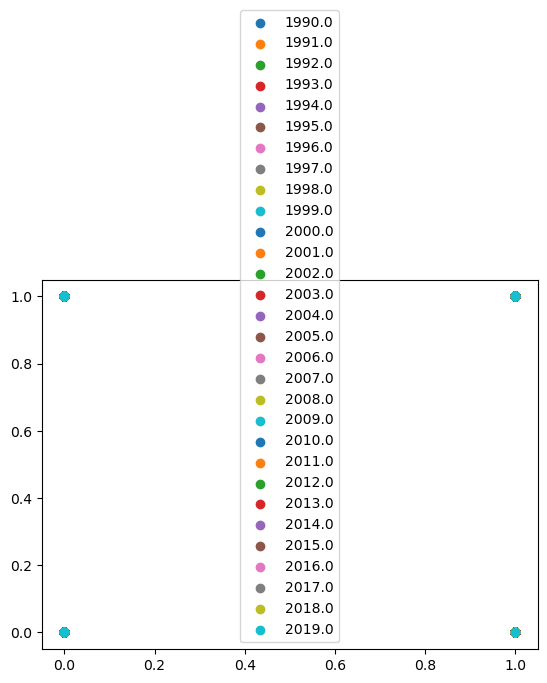

In [8]:
years = np.unique(processed_data.year)

for year in years[:-1]:
    train_data = processed_data.loc[(processed_data.year <= year)]
    test_data = processed_data.loc[processed_data.year == year + 1]
    clf = linear_model.LogisticRegression(random_state=0).fit(train_data[predictors],
                                                              train_data[outputs].values.ravel() >= 2)
    print(clf.score(test_data[predictors], 
                    test_data[outputs] >= 2) )
    plt.scatter(1*(test_data[outputs].values.ravel() >= 2), clf.predict(test_data[predictors]), label = str(year))

#plt.plot(np.linspace(0, 1000, 20), np.linspace(0, 1000, 20))
# plt.semilogy()
# plt.semilogx()
plt.legend()